In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Crop Production data.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [3]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.describe

<bound method NDFrame.describe of                          State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Pr

In [5]:
df = df.dropna()

In [6]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [7]:
label_encoder = LabelEncoder()
df['State_Name'] = label_encoder.fit_transform(df['State_Name'])
df['District_Name'] = label_encoder.fit_transform(df['District_Name'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Crop'] = label_encoder.fit_transform(df['Crop'])

C:\Users\HP\AppData\Local\Temp\ipykernel_11996\3677444222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State_Name'] = label_encoder.fit_transform(df['State_Name'])
C:\Users\HP\AppData\Local\Temp\ipykernel_11996\3677444222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['District_Name'] = label_encoder.fit_transform(df['District_Name'])
C:\Users\HP\AppData\Local\Temp\ipykernel_11996\3677444222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [8]:
X = df[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area']]
y = df['Production']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = rf_model.predict(X_test)

Mean Absolute Error: 144581.94819827945
Mean Squared Error: 30311677826039.062
R² Score: 0.9246611243758499


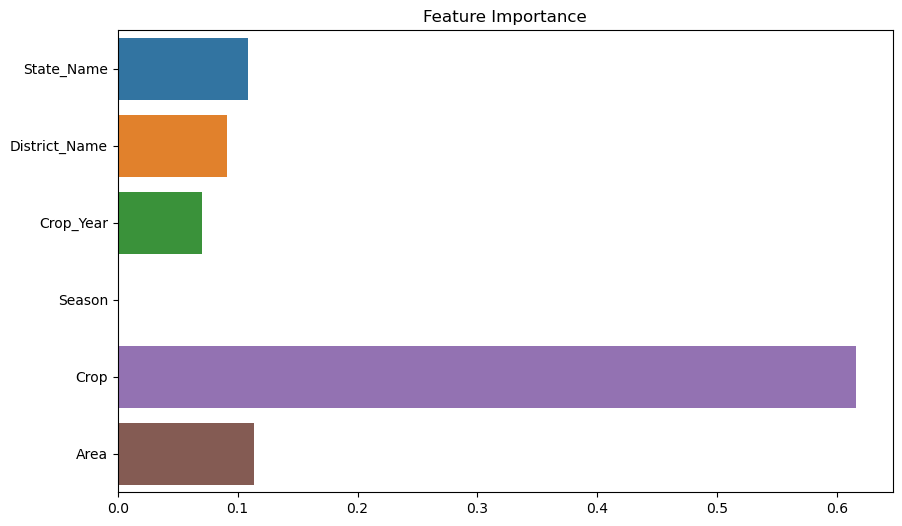

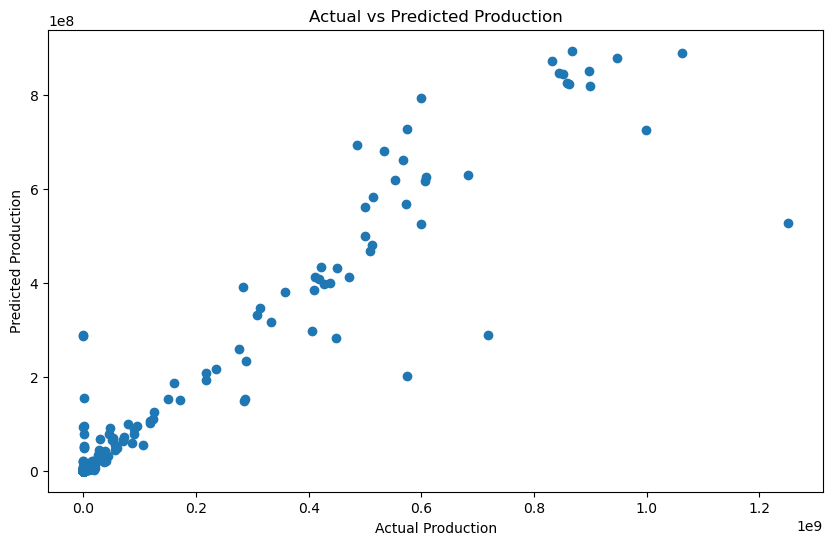

Top factors influencing crop production are:
State_Name: 0.1083
District_Name: 0.0915
Crop_Year: 0.0706
Season: 0.0000
Crop: 0.6156
Area: 0.1140


In [13]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Feature importance
importance = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.title('Feature Importance')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual vs Predicted Production')
plt.show()

# Insights and recommendations (example)
print("Top factors influencing crop production are:")
for feature, importance in zip(feature_names, importance):
    print(f'{feature}: {importance:.4f}')

C:\Users\HP\AppData\Local\Temp\ipykernel_11996\1867353814.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Crop_Year', y='Production', hue='State_Name', estimator='sum', ci=None, palette='tab20')


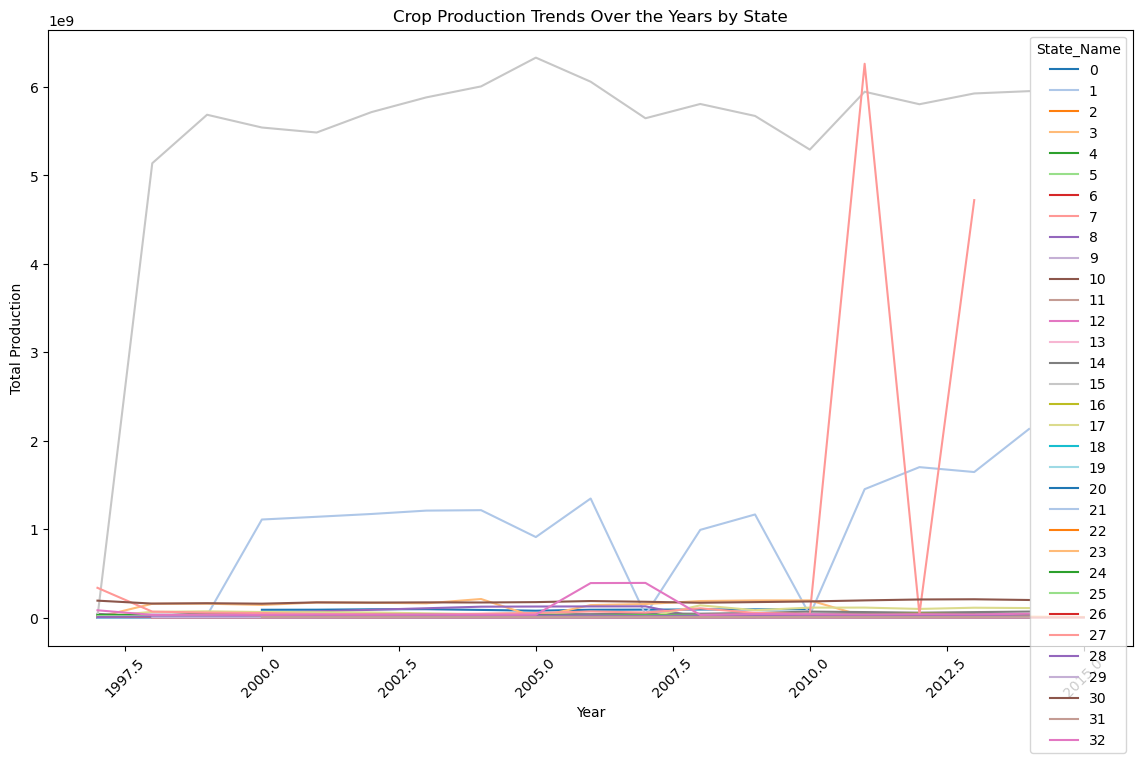

In [14]:
# Crop Production Trends Over the Years by State
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Crop_Year', y='Production', hue='State_Name', estimator='sum', ci=None, palette='tab20')
plt.title('Crop Production Trends Over the Years by State')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11996\1107897109.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Crop_Year', y='Production', hue='State_Name', estimator='sum', ci=None, palette='tab20', legend=None)


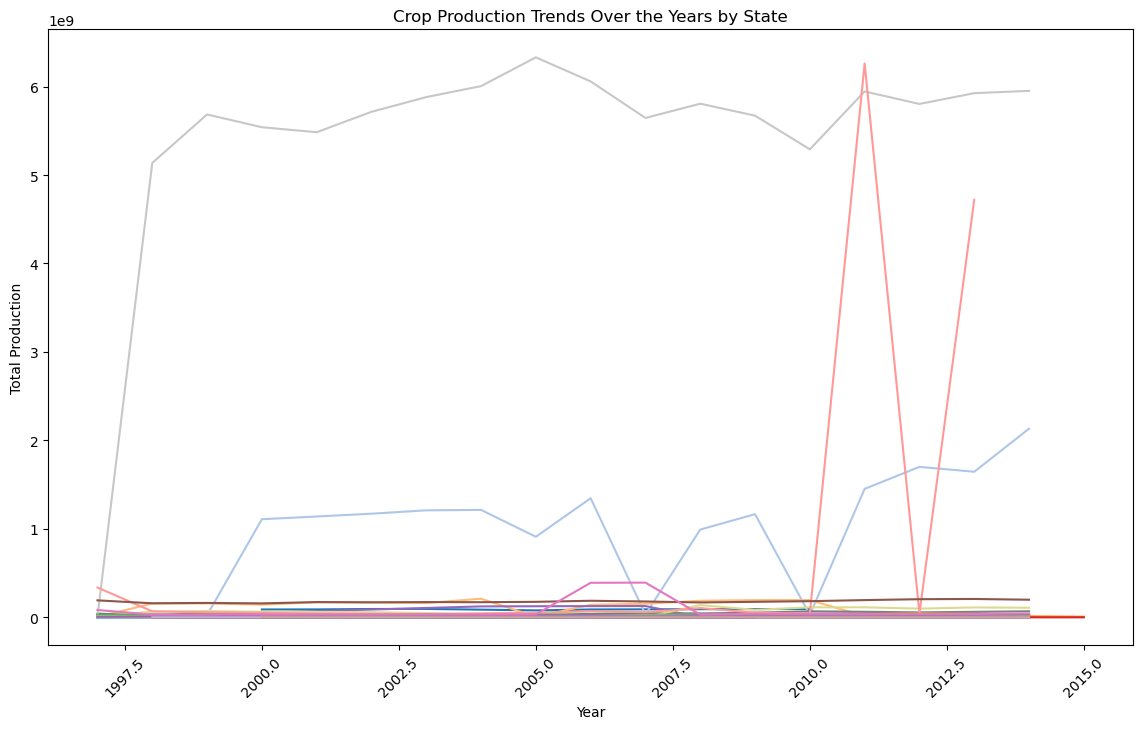

In [15]:
# Visualize crop production trends over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Crop_Year', y='Production', hue='State_Name', estimator='sum', ci=None, palette='tab20', legend=None)
plt.title('Crop Production Trends Over the Years by State')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.show()



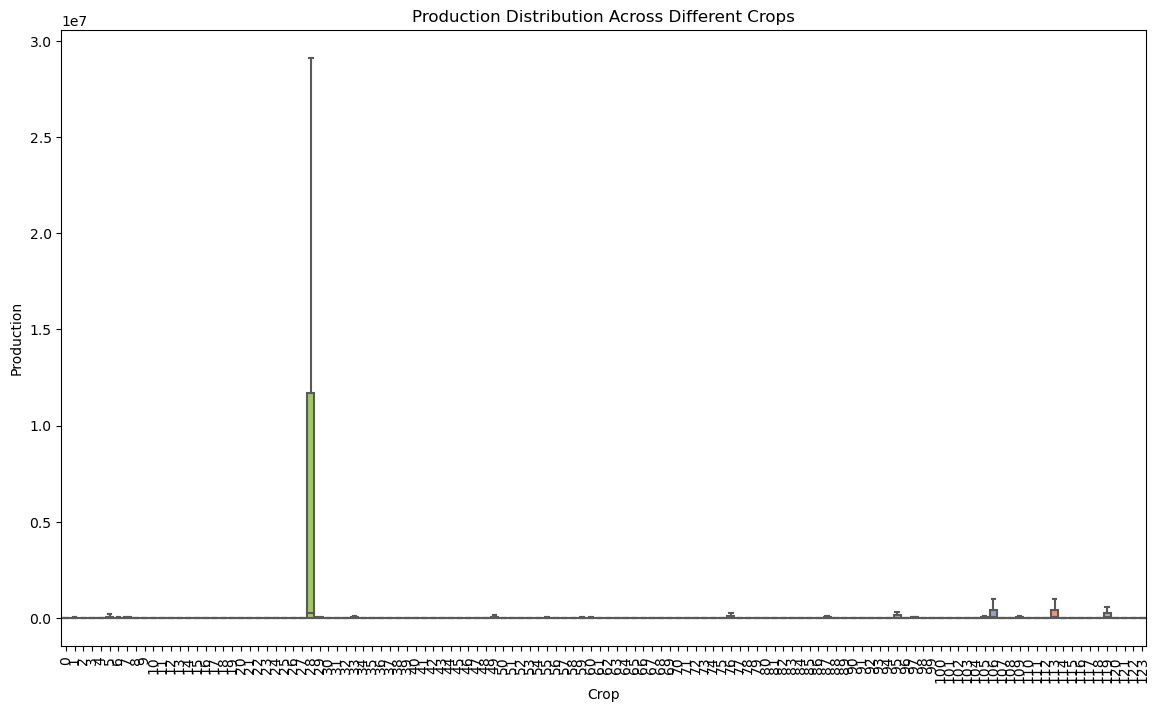

In [57]:
# Visualize production distribution for different crops
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Crop', y='Production', showfliers=False, palette='Set2')
plt.title('Production Distribution Across Different Crops')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()



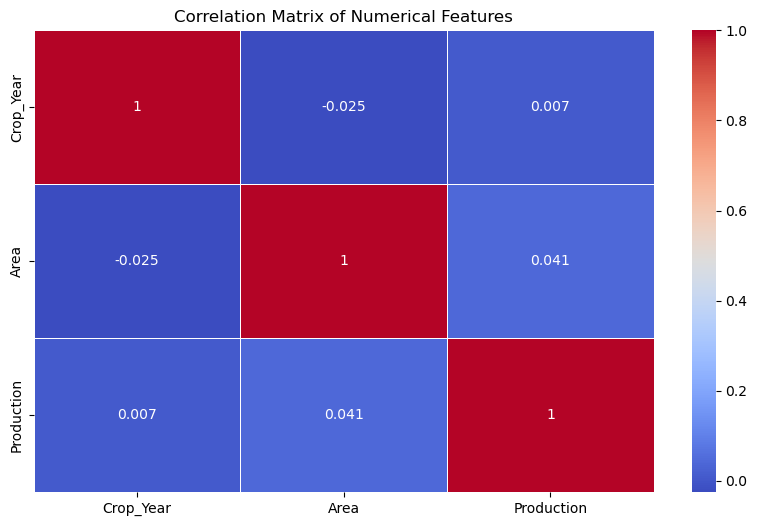

In [58]:
# Correlation heatmap to explore relationships between numerical features
plt.figure(figsize=(10, 6))
corr = df[['Crop_Year', 'Area', 'Production']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()



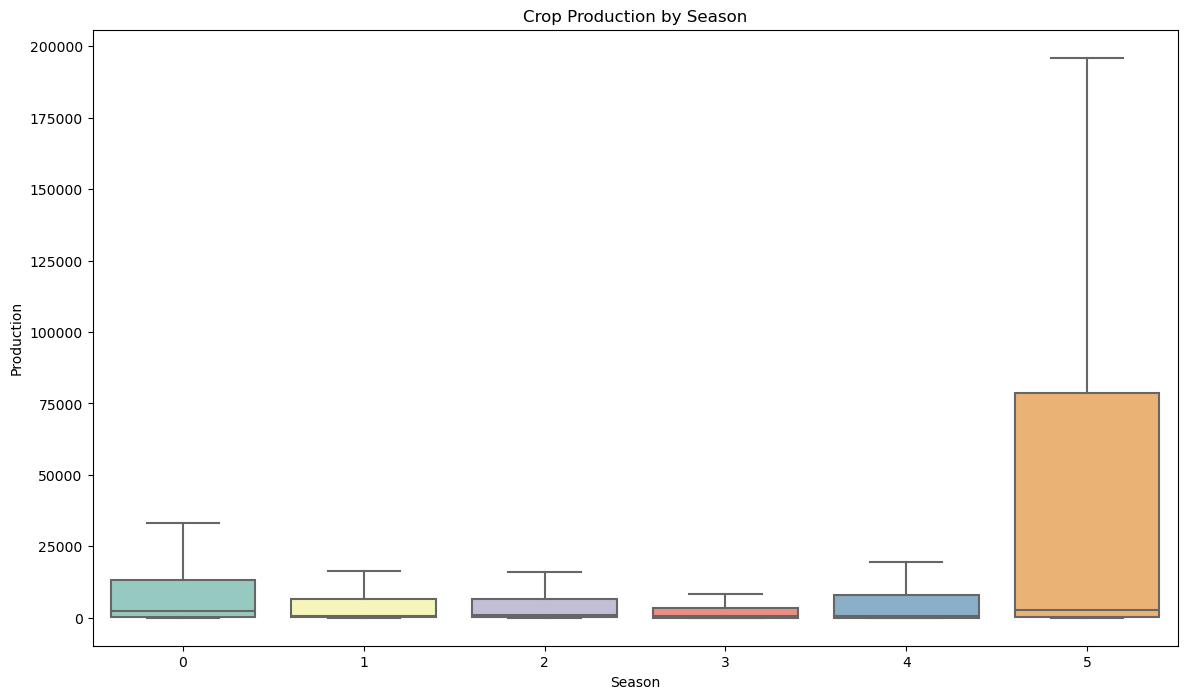

In [59]:
# Visualize crop production by season
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Season', y='Production', showfliers=False, palette='Set3')
plt.title('Crop Production by Season')
plt.xlabel('Season')
plt.ylabel('Production')
plt.show()



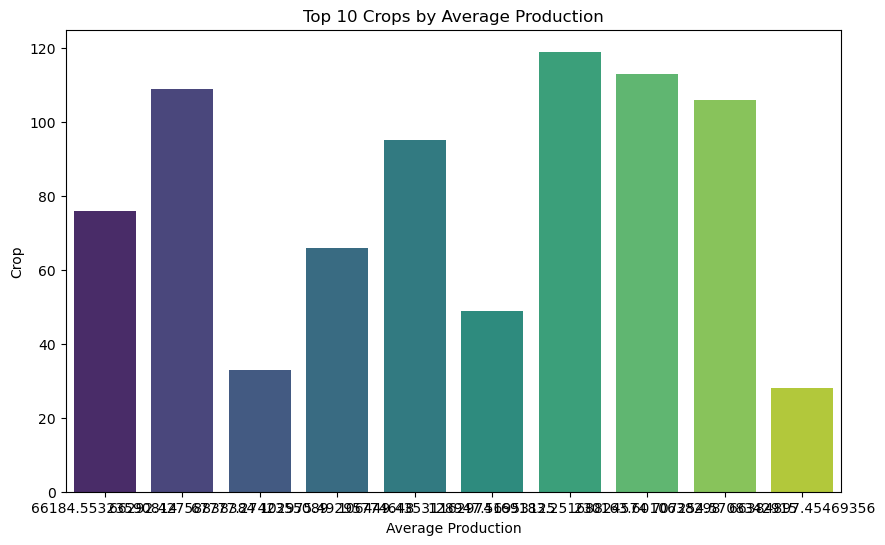

In [60]:
# Top 10 crops by average production
top_crops = df.groupby('Crop')['Production'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_crops, y=top_crops.index, palette='viridis')
plt.title('Top 10 Crops by Average Production')
plt.xlabel('Average Production')
plt.ylabel('Crop')
plt.show()


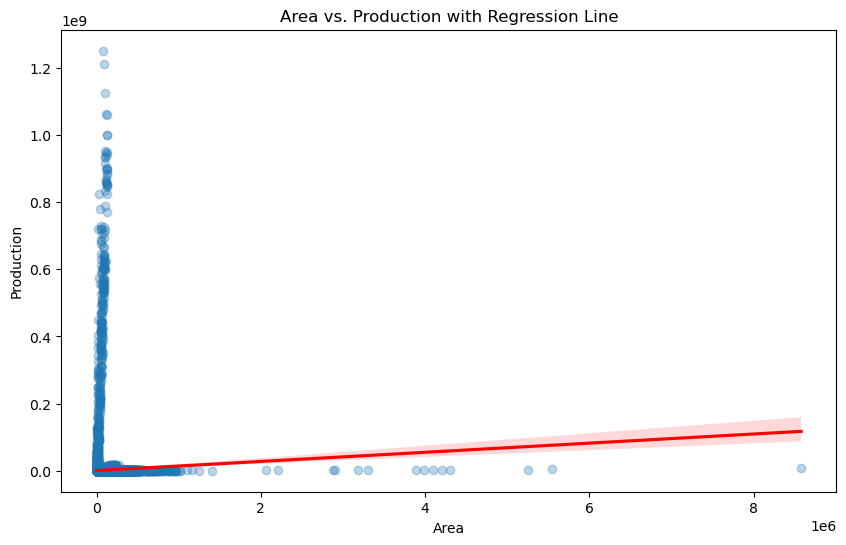

In [61]:

# Area vs. Production scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Area', y='Production', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Area vs. Production with Regression Line')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()



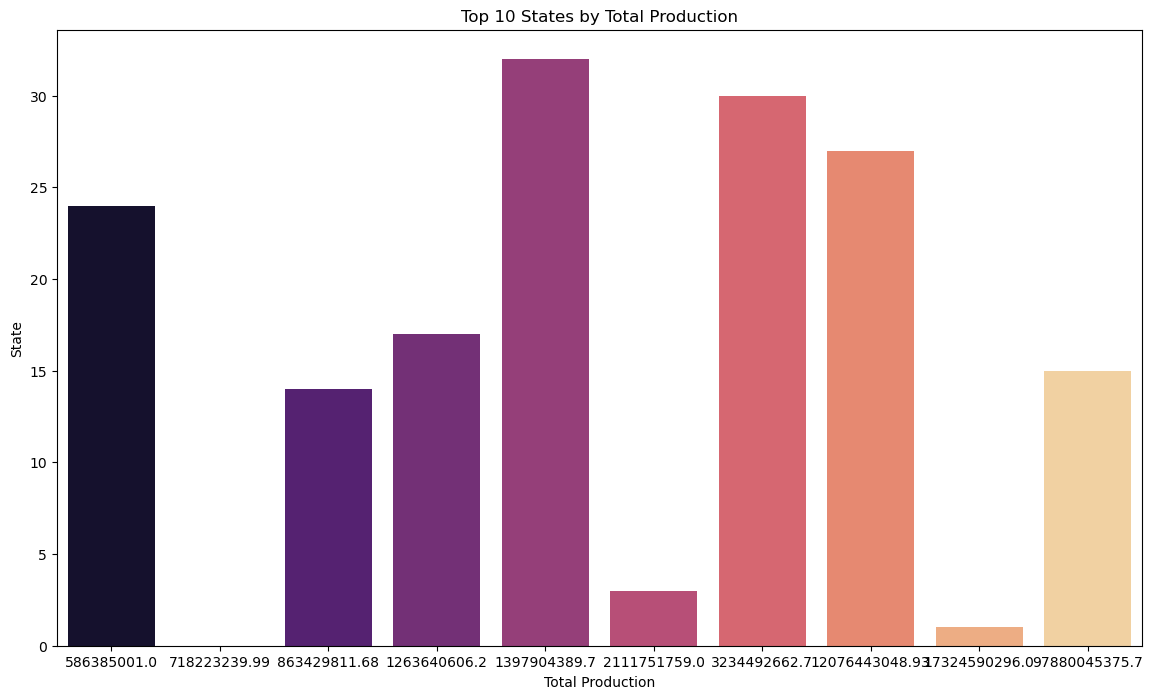

In [62]:
# Production comparison by state (Top 10 states)
top_states = df.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_states, y=top_states.index, palette='magma')
plt.title('Top 10 States by Total Production')
plt.xlabel('Total Production')
plt.ylabel('State')
plt.show()